In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("season-1819_csv.csv")

In [3]:
data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2018-08-10,Man United,Leicester,2,1,H,1,0,H,A Marriner,...,6,4,11,8,2,5,2,1,0,0
1,2018-08-11,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,...,4,1,11,9,7,4,1,1,0,0
2,2018-08-11,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,...,6,9,9,11,5,5,1,2,0,0
3,2018-08-11,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,...,1,4,9,8,2,5,2,1,0,0
4,2018-08-11,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,...,2,5,11,12,3,5,2,2,0,0


In [7]:
data.AwayTeam.nunique()

20

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
home_team_short_target = data.groupby(["HomeTeam","HST"]).sum().reset_index()

/home/oni/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Home teamshot on target')

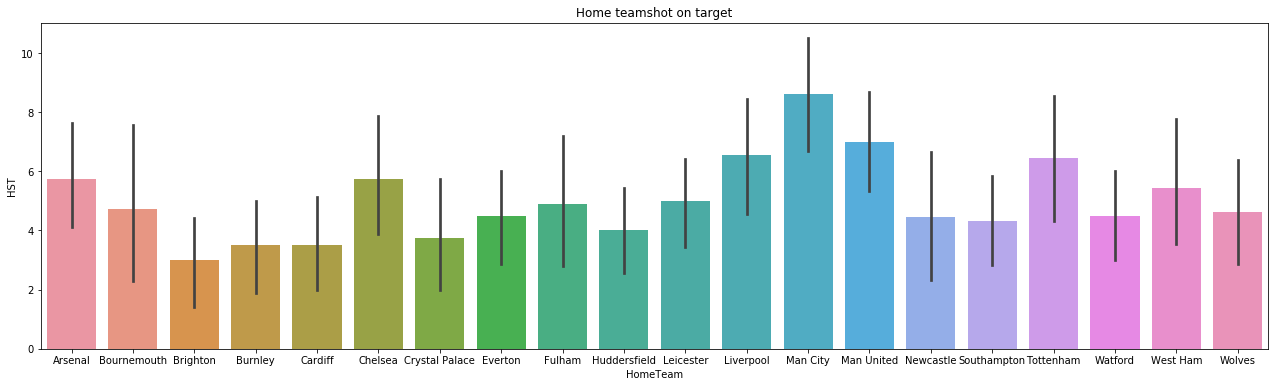

In [6]:
fig, ax = plt.subplots(figsize=(22,6))
sns.barplot(x="HomeTeam",y="HST",data = home_team_short_target,ax=ax,)
plt.title("Home teamshot on target")

Text(0.5,1,'Away teamshot on target')

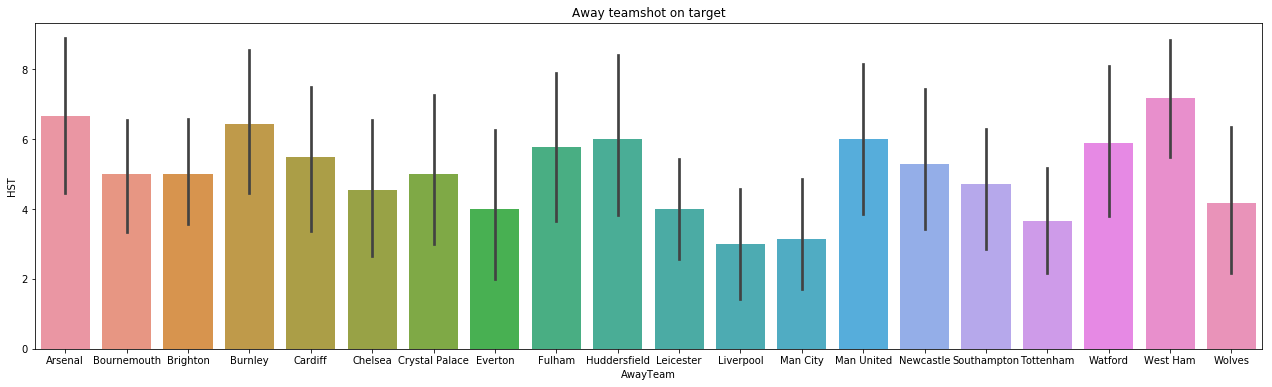

In [7]:
away_team_short_target = data.groupby(["AwayTeam","HST"]).count().reset_index()
fig, ax = plt.subplots(figsize=(22,6))
sns.barplot(x="AwayTeam",y="HST",data = away_team_short_target,ax=ax,)
plt.title("Away teamshot on target")

It seems man-city has the highest shot on target home and lowest away

Text(0.5,1,'Away teamshot on target')

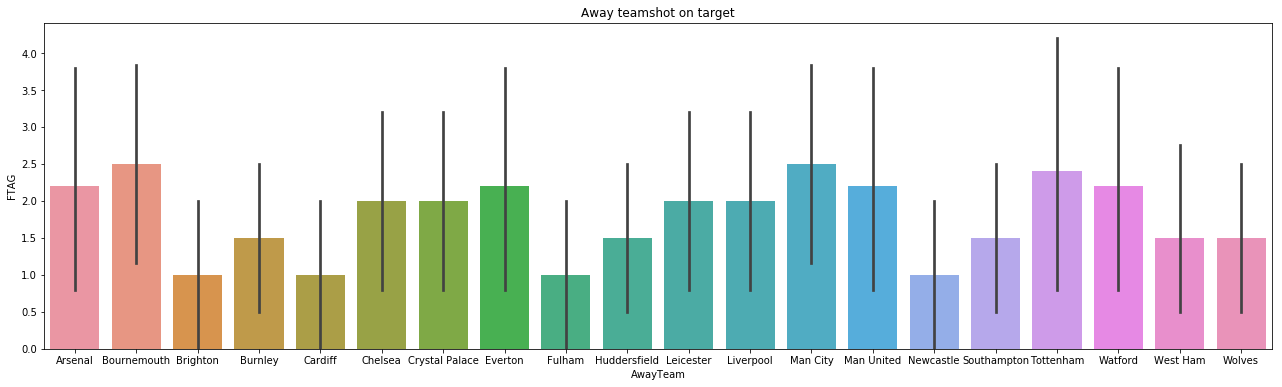

In [8]:
away_fullTime_goal = data.groupby(["AwayTeam","FTAG"]).count().reset_index()
fig, ax = plt.subplots(figsize=(22,6))
sns.barplot(x="AwayTeam",y="FTAG",data = away_fullTime_goal,ax=ax,)
plt.title("Away teamshot on target")

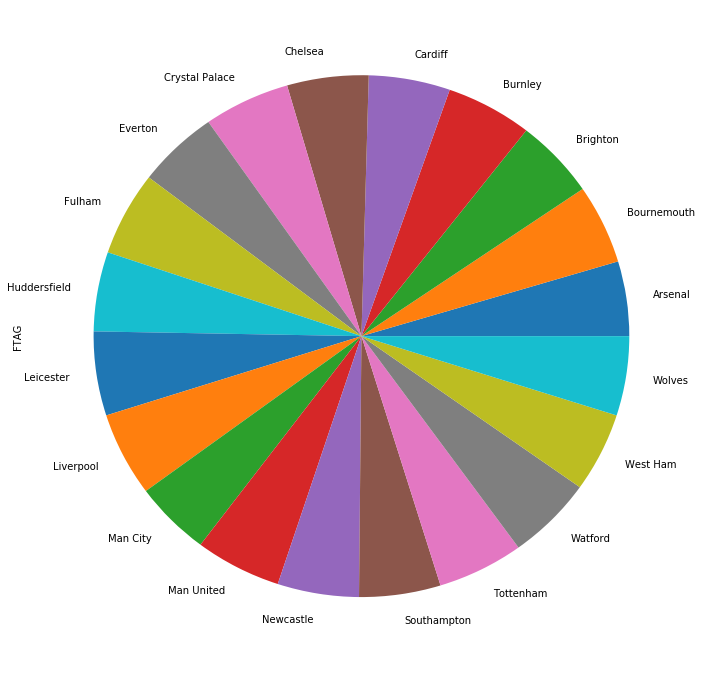

In [9]:
fig, ax = plt.subplots(figsize=(12,12))
away_team_short_target = data.groupby(["AwayTeam"])["FTAG"].count().plot(ax=ax,kind='pie')

In [10]:
data["FTR"] = data["FTR"].astype("str")

In [11]:
data["FTR"].dtype

dtype('O')

In [8]:
data.AwayTeam.nunique()

20

In [9]:
away_team_won = ((data[["AwayTeam","FTR"]].query("FTR =='A'").reset_index()).groupby(["AwayTeam"])["FTR"].count()
                ).reset_index().rename(columns={'AwayTeam':"club","FTR":"won"})

home_team_won = ((data[["HomeTeam","FTR"]].query("FTR =='H'").reset_index()).groupby(["HomeTeam"])["FTR"].count()
                ).reset_index().rename(columns={'HomeTeam':"club","FTR":"won"})

awayTeam_draw = ((data[["AwayTeam","FTR"]].query("FTR =='D'").reset_index()).groupby(["AwayTeam"])["FTR"].count()
).reset_index().rename(columns={'AwayTeam':"club","FTR":"draw"})

homeTeam_draw = ((data[["HomeTeam","FTR"]].query("FTR =='D'").reset_index()).groupby(["HomeTeam"])["FTR"].count()
).reset_index().rename(columns={'HomeTeam':"club","FTR":"draw"})

awayTeam_lost = ((data[["AwayTeam","FTR"]].query("FTR =='H'").reset_index()).groupby(["AwayTeam"])["FTR"].count()).reset_index().rename(columns={'AwayTeam':"club","FTR":"lost"})

homeTeam_lost = ((data[["HomeTeam","FTR"]].query("FTR =='A'").reset_index()
                 ).groupby(["HomeTeam"])["FTR"].count()).reset_index().rename(columns={'HomeTeam':"club","FTR":"lost"})

In [36]:
point_table=home_team_won.merge(away_team_won,on=['club'],how="outer")\
                .merge(homeTeam_draw,on=['club'],how="outer")\
                .merge(awayTeam_draw,on=['club'],how="outer")\
                .merge(homeTeam_lost,on=['club'],how="outer")\
                .merge(awayTeam_lost,on=['club'],how="outer")

In [37]:
point_table

,club,won_x,won_y,draw_x,draw_y,lost_x,lost_y
0,Arsenal,14,6,2.0,4.0,2.0,6
1,Bournemouth,7,5,5.0,NaN,6.0,12
2,Brighton,6,3,4.0,3.0,7.0,11
3,Burnley,7,4,2.0,5.0,8.0,9
4,Cardiff,6,3,2.0,2.0,10.0,12
5,Chelsea,11,9,6.0,1.0,1.0,7
6,Crystal Palace,4,8,4.0,2.0,9.0,8
7,Everton,9,5,4.0,3.0,5.0,9
8,Fulham,5,1,3.0,2.0,9.0,15
9,Huddersfield,2,1,2.0,3.0,14.0,13


In [38]:
point_table= point_table.rename(columns={'won_x':'home_win','won_y':'away_win','lost_x':'home_loss','lost_y':'away_loss'})
point_table['matches_won']=point_table.home_win+point_table.away_win
point_table['matches_lost']=point_table.home_loss+point_table.away_loss
point_table['matches_drawn']=point_table.draw_x+point_table.draw_y
point_table=point_table.drop(['draw_x','draw_y'],axis=1)
point_table['total_matches']=point_table.matches_won+point_table.matches_lost+point_table.matches_drawn

In [39]:
point_table

,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches
0,Arsenal,14,6,2.0,6,20,8.0,6.0,34.0
1,Bournemouth,7,5,6.0,12,12,18.0,NaN,NaN
2,Brighton,6,3,7.0,11,9,18.0,7.0,34.0
3,Burnley,7,4,8.0,9,11,17.0,7.0,35.0
4,Cardiff,6,3,10.0,12,9,22.0,4.0,35.0
5,Chelsea,11,9,1.0,7,20,8.0,7.0,35.0
6,Crystal Palace,4,8,9.0,8,12,17.0,6.0,35.0
7,Everton,9,5,5.0,9,14,14.0,7.0,35.0
8,Fulham,5,1,9.0,15,6,24.0,5.0,35.0
9,Huddersfield,2,1,14.0,13,3,27.0,5.0,35.0


It's time to award points for each team as per their performance in the matches. In premier league the winning team gets 3 points. for a decided match. Otherwise each team gets 1 point each if the match ends as a tie

In [40]:
point_table['points']=(point_table.matches_won*3)+(point_table.matches_drawn*1)

we get the goal scored amd conceded by each team

In [41]:
away_goal = ((data[["AwayTeam","FTAG"]].groupby("AwayTeam")["FTAG"].sum())
            ).reset_index().rename(columns={'AwayTeam':"club","FTAG":"away_goal"})

home_goal = ((data[["HomeTeam","FTHG"]].groupby("HomeTeam")["FTHG"].sum())
            ).reset_index().rename(columns={'HomeTeam':"club","FTHG":"home_goal"})

away_conceded = ((data[["AwayTeam","FTHG"]].groupby("AwayTeam")["FTHG"].sum())
            ).reset_index().rename(columns={'AwayTeam':"club","FTHG":"goals_conceded"})

home_conceded = ((data[["HomeTeam","FTAG"]].groupby("HomeTeam")["FTAG"].sum())
            ).reset_index().rename(columns={'HomeTeam':"club","FTAG":"goals_conceded"})

In [46]:
point_table=point_table.merge(home_goal,on=['club'])\
                .merge(away_goal,on=['club'])\
                .merge(home_conceded,on=['club'])\
                .merge(away_conceded,on=['club'])

In [48]:
len(point_table)

20

In [49]:
point_table['goals_scored']=point_table.home_goal+point_table.away_goal
point_table['goals_conceded']=point_table.goals_conceded_x+point_table.goals_conceded_y
point_table['goal_difference']=point_table.goals_scored-point_table.goals_conceded
point_table= point_table.drop(['goals_conceded_x','goals_conceded_y'],axis=1)

We will sort the points table so as to get the team rankings in each of the seasons.

In [50]:
point_table= point_table.sort_values(by=['points','goal_difference']).reset_index().drop('index',axis=1)

In [53]:
len(point_table)

20

In [51]:
df=point_table.copy()

In [54]:
champs=df[df.groupby(['club'])['points'].transform(max)==df.points].reset_index()
champs.tail()

,index,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goal,away_goal,goals_scored,goals_conceded,goal_difference
12,12,Everton,9,5,5.0,9,14,14.0,7.0,35.0,49.0,28,22,50,44,6
13,13,Man United,10,9,1.0,7,19,8.0,7.0,34.0,64.0,32,31,63,48,15
14,14,Arsenal,14,6,2.0,6,20,8.0,6.0,34.0,66.0,41,27,68,43,25
15,15,Chelsea,11,9,1.0,7,20,8.0,7.0,35.0,67.0,36,23,59,38,21
16,16,Liverpool,15,12,NaN,1,27,NaN,7.0,NaN,88.0,48,31,79,20,59


In [55]:
len(champs)

17

## Note
the groupying is not needed just to make it easir and quick to just do the visualization
instead of the extra 4line code

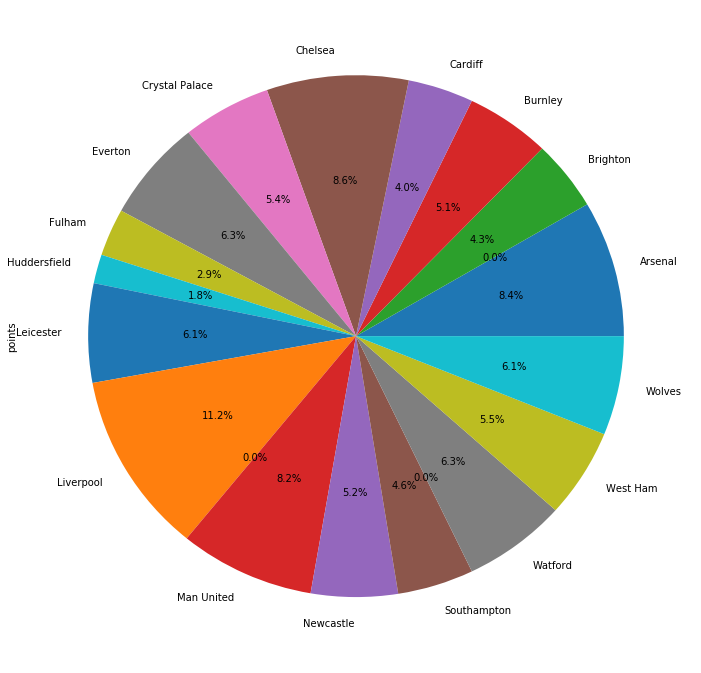

In [57]:
f = df.groupby("club")["points"].max().plot(kind="pie",figsize=(12,12),autopct='%2.1f%%')

it shows that chelsea has the highest point follow by arsenal

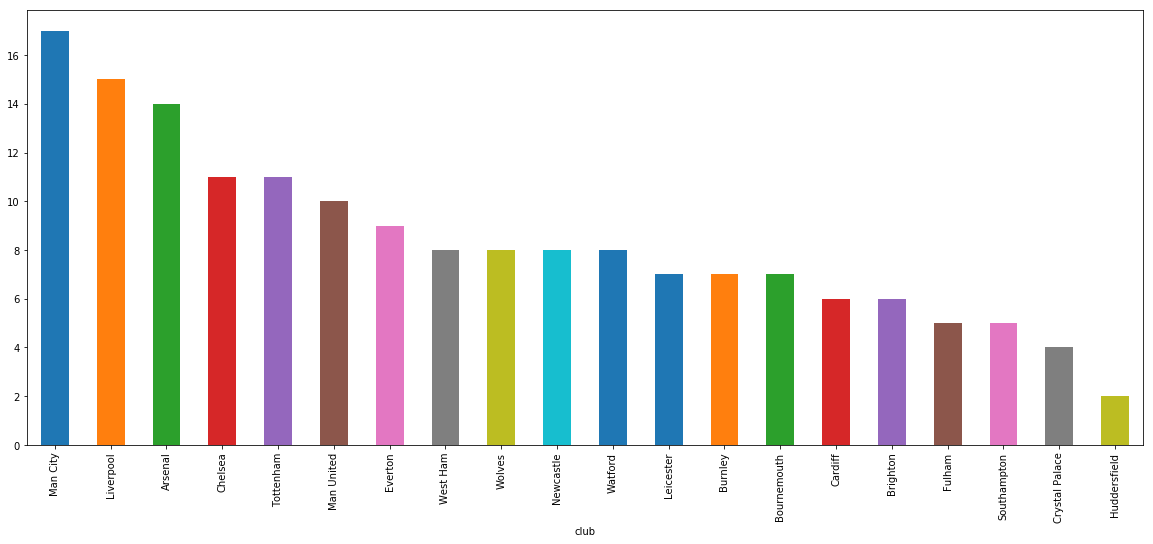

In [58]:
df.groupby(['club'])['home_win'].sum().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(20,8))


Bar graphs showing the dominance in the league with total home wins

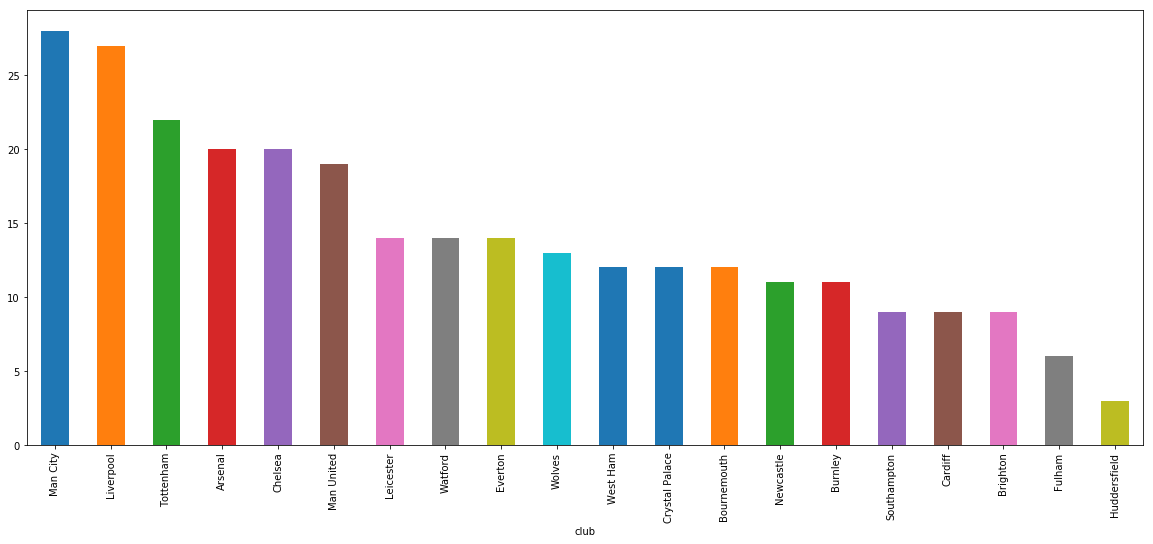

In [59]:
df.groupby(['club'])['matches_won'].sum().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(20,8))

** Mancity and Liverpool has the highest matches won 

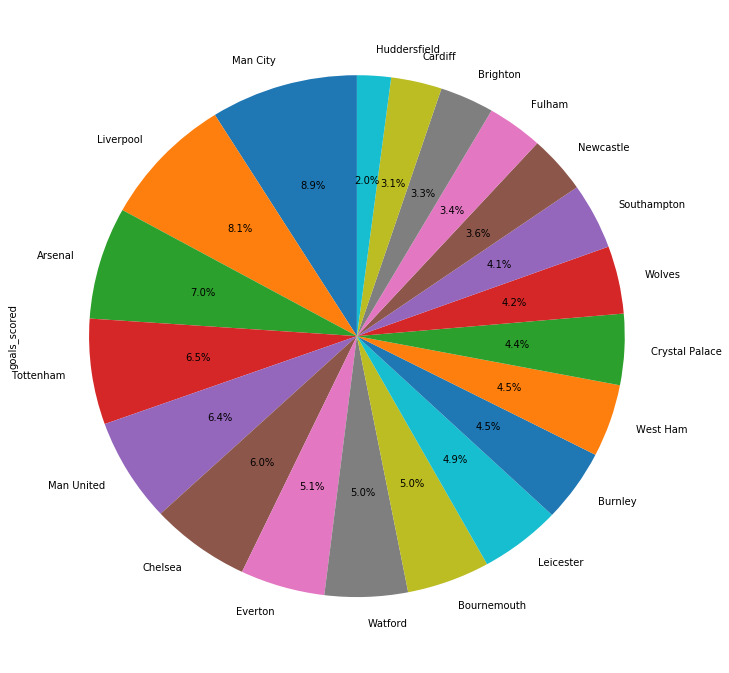

In [60]:
df.groupby(['club'])['goals_scored'].sum().sort_values(ascending=False).plot(kind="pie",figsize=(12,12),autopct='%1.1f%%',startangle=90)

In [61]:
home_goals= df[["club","home_goal"]].sort_values(by="home_goal",ascending=False)
away_goals = df[["club","away_goal"]].sort_values(by="away_goal",ascending=False)
goal_scored = df[["club","goals_scored"]].sort_values(by="goals_scored",ascending=False)

merge_goals = home_goals.merge(away_goals,on=["club"])\
                        .merge(goal_scored,on=["club"])

home_win = df[["club","home_win"]].sort_values(by="home_win",ascending=False)
away_win = df[["club","away_win"]].sort_values(by="away_win",ascending=False)
matches_won = df[["club","matches_won"]].sort_values(by="matches_won",ascending=False)

wins = home_win.merge(away_win,on=["club"])\
                .merge(matches_won,on=["club"])\
                .merge(merge_goals,on=['club'])

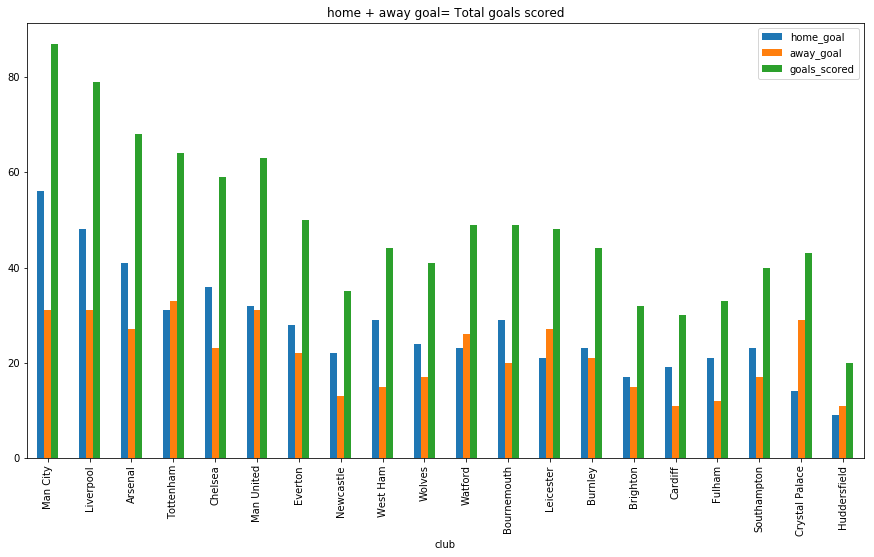

In [62]:
wins.plot(x='club',y=['home_goal','away_goal','goals_scored'], kind="bar",figsize=(15,8),title="home + away goal= Total goals scored")

the higher the number of goals the more the matches won

/home/oni/anaconda2/lib/python2.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


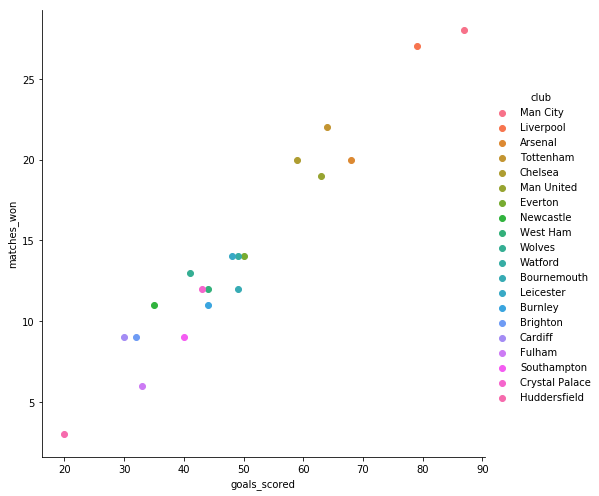

In [65]:
sns.FacetGrid(wins, hue="club", size=7).map(plt.scatter, "goals_scored", "matches_won").add_legend()

Dominance of each team on their home ground and away ground with respect tot total matches won

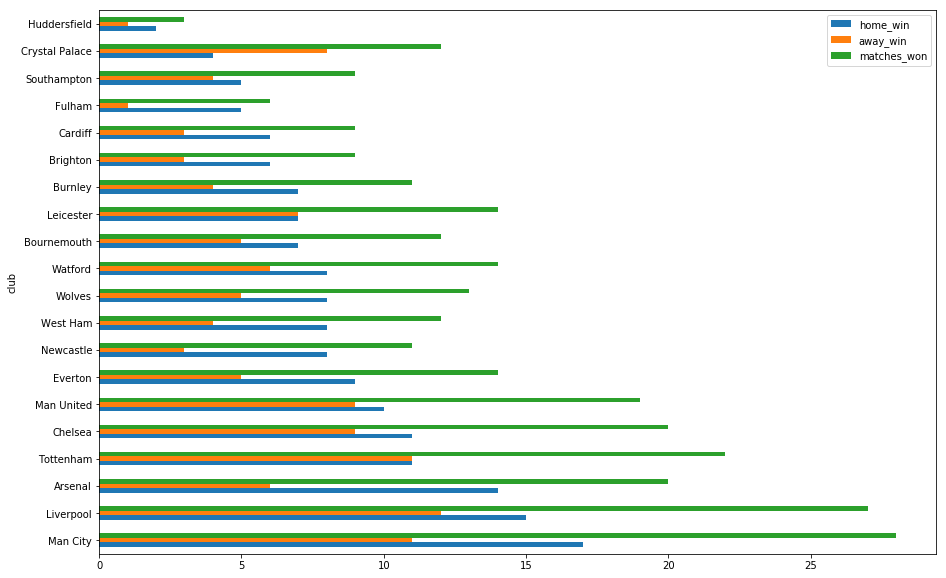

In [66]:
wins.plot(x='club',y=['home_win','away_win','matches_won'], kind="barh",figsize=(15,10))